### Neural Network Regression with TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:

    Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
    Predict the coordinates of a bounding box of an item in an image.
    Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

### Creating data to view and fit

Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

In [145]:
import numpy as np
import matplotlib.pyplot as plt

In [146]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

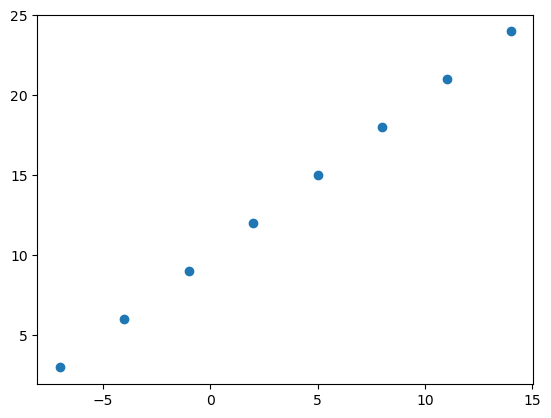

In [147]:
# Visualize it
plt.scatter(X, y);

### Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [150]:
import tensorflow as tf

In [151]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [152]:
house_info.shape

TensorShape([3])

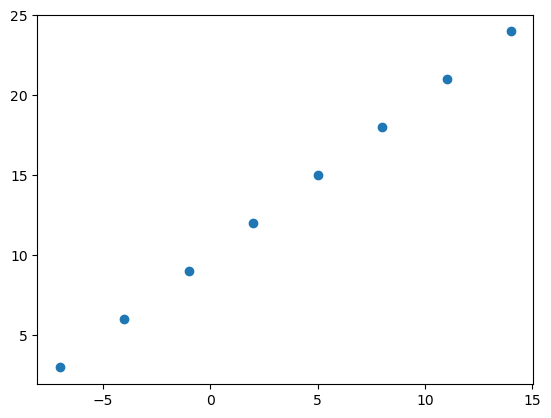

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);



Our goal here will be to use X to predict y.

So our input will be X and our output will be y.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.


In [155]:
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [156]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

### Steps in modelling with TensorFlow

in TensorFlow, there are typically 3 fundamental steps to creating and training a model.

    Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
    Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
    Fitting a model - letting the model try to find patterns in the data (how does X get to y).


In [159]:
# Set random seed
tf.random.set_seed(42)

In [160]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

In [161]:
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

In [162]:
# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 15.5221 - mae: 15.5221   
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - loss: 15.2408 - mae: 15.2408
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 14.9655 - mae: 14.9655
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - loss: 14.8330 - mae: 14.8330
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - loss: 14.7005 - mae: 14.7005


In [163]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

### Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

    Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
    Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
    Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


In [166]:
# Set random seed
tf.random.set_seed(42)

In [167]:
# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step - loss: 12.6545 - mae: 12.6545
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - loss: 12.5220 - mae: 12.5220
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - loss: 12.3895 - mae: 12.3895
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - loss: 12.2570 - mae: 12.2570
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - loss: 12.1245 - mae: 12.1245
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 11.9920 - mae: 11.9920
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - loss: 11.8595 - mae: 11.8595
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - loss: 11.7270 - mae: 11.7270
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - loss: 11.5945 - mae: 11.5945
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - loss: 11.4620 - mae: 11.4620
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - loss: 11.3295 - mae: 11.3295
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 11.1970 - mae: 11.1970
Epoch 13/100




You might've noticed the loss value decrease from before (and keep decreasing as the number of epochs gets higher).

What do you think this means for when we make a prediction with our model?

How about we try predict on 17.0 again?


In [169]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [170]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

ValueError: Unrecognized data type: x=[17.0] (of type <class 'list'>)



1/1 [==============================] - 0s 61ms/step

array([[29.499516]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?


### Evaluating a model

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

    The data - what data are you working with? What does it look like?
    The model itself - what does the architecture look like? What are the different shapes?
    The training of a model - how does a model perform while it learns?
    The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).

In [175]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [177]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [179]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

### Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

    Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
    Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
    Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

In [181]:
# Check how many samples we have
len(X)

50

In [183]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

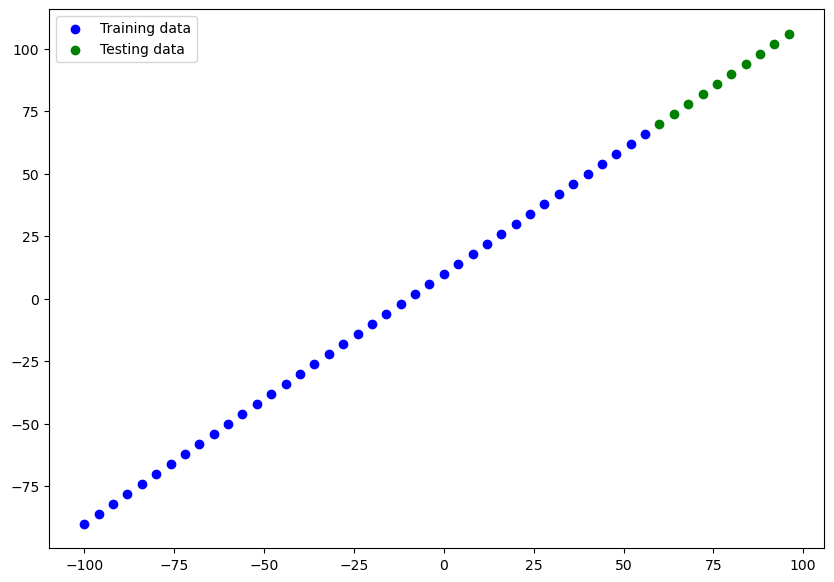

In [185]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();



Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (X_train) to draw the green dots (X_test).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).


In [187]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

In [189]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
     

# This will work after specifying the input shape
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

    Total params - total number of parameters in the model.
    Trainable parameters - these are the parameters (patterns) the model can update as it trains.
    Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [191]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

### Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [193]:
# Make predictions
y_preds = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


In [195]:
# View the predictions
y_preds

array([[53.93599 ],
       [57.44014 ],
       [60.94429 ],
       [64.44844 ],
       [67.95259 ],
       [71.45674 ],
       [74.960884],
       [78.465034],
       [81.969185],
       [85.473335]], dtype=float32)

Okay, we get a list of numbers but how do these compare to the ground truth labels?

In [197]:
### Let's build a plotting function to find out.
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

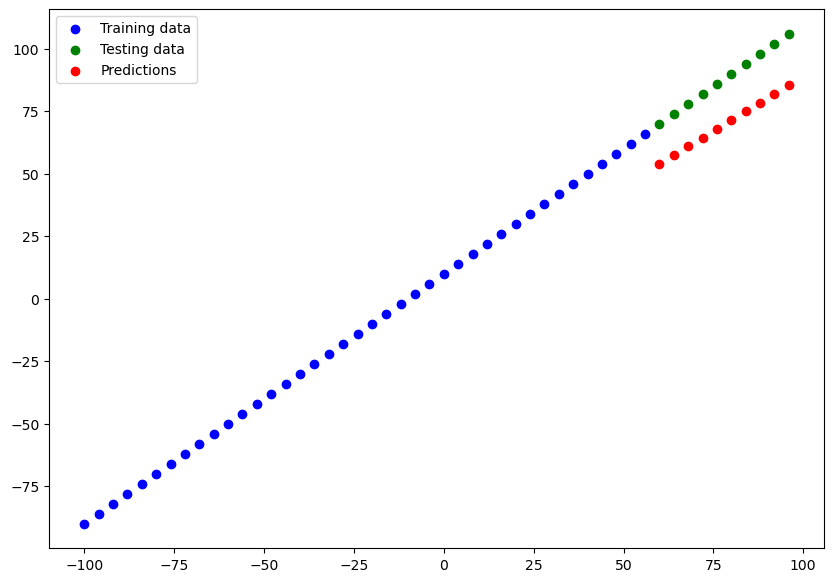

In [199]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

From the plot we can see our predictions aren't totally outlandish but they definitely aren't anything special either.

### Evaluating predictions

In [ ]:
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

    Mean absolute error (MAE) - the mean difference between each of the predictions.
    Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

In [202]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - loss: 18.2953 - mae: 18.2953


[18.295337677001953, 18.295337677001953]



In our case, since we used MAE for the loss function as well as MAE for the metrics, model.evaulate() returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.


In [205]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

AttributeError: module 'keras._tf_keras.keras.metrics' has no attribute 'mean_absolute_error'

### Running experiments to improve a model

In [ ]:
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

    Get more data - get more examples for your model to train on (more opportunities to learn patterns).
    Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
    Train for longer - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

    model_1 - same as original model, 1 layer, trained for 100 epochs.
    model_2 - 2 layers, trained for 100 epochs.
    model_3 - 2 layers, trained for 500 epochs.


In [227]:
### Build model_1

In [208]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - loss: 23.4334 - mae: 23.4334
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 12.0705 - mae: 12.0705
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 12.7064 - mae: 12.7064
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 8.2209 - mae: 8.2209
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 8.8773 - mae: 8.8773
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 7.8207 - mae: 7.8207
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 10.7952 - mae: 10.7952
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 7.6238 - mae: 7.6238
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 11.9687 - mae: 11.9687
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 8.1389 - mae: 8.1389
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 8.7888 - mae: 8.7888
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 7.7485 - mae: 7.7485
Epoch 13/100
2/2 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


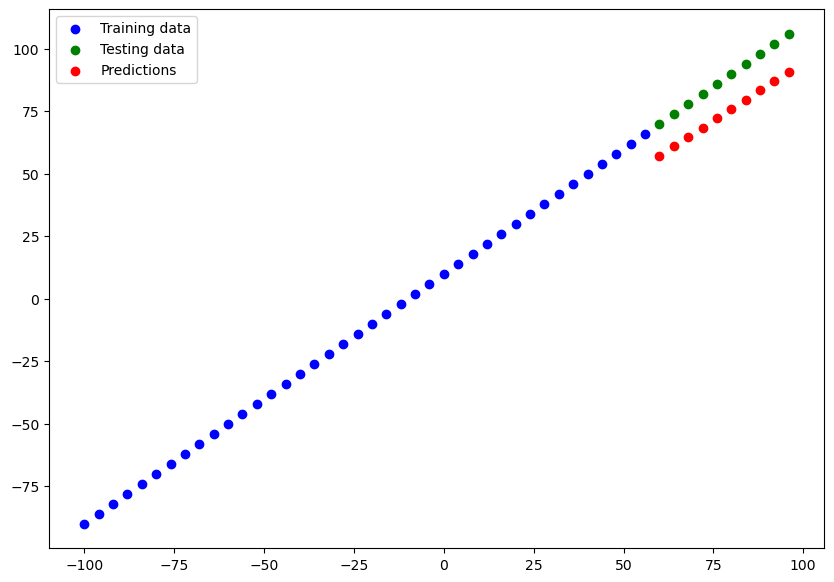

In [210]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [212]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

NameError: name 'mae' is not defined

### Build model_2

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [216]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


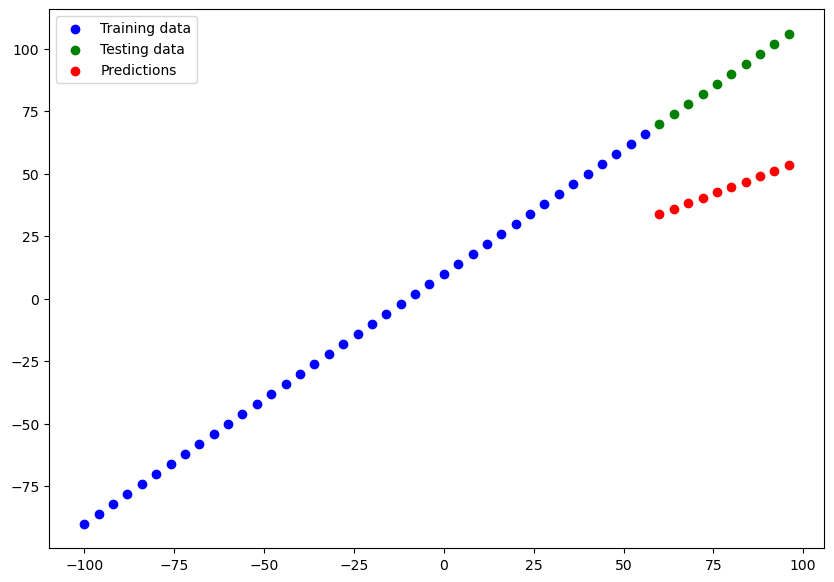

In [218]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

### Build model_3

For our 3rd model, we'll keep everything the same as model_2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [232]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


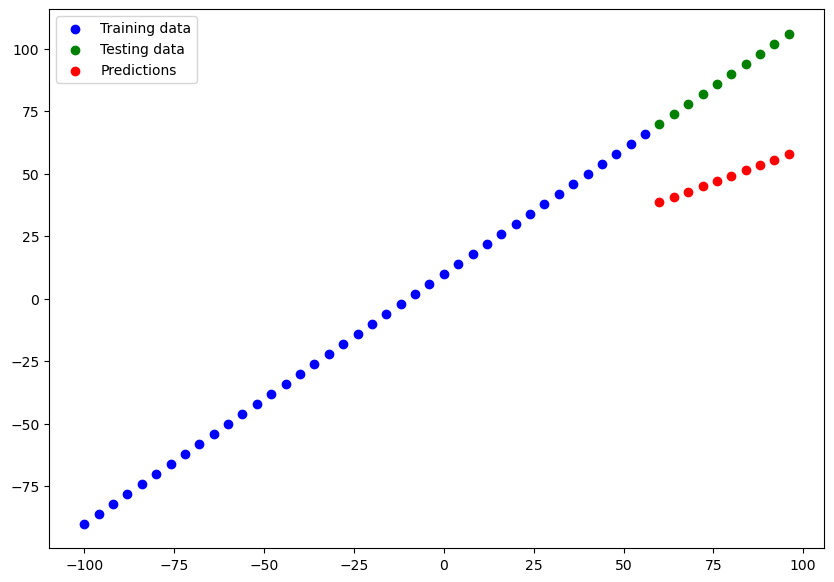

In [234]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)



Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).


### Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [239]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

NameError: name 'mae_1' is not defined

In [241]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

NameError: name 'model_results' is not defined

### Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

    The SavedModel format (default).
    The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [245]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=best_model_SavedModel_format.